#**Black Friday Sales Prediction**

## **Problem Definition**

The goal is to build a predictive model to forecast purchase amounts during Black Friday sales based on customer demographics (e.g., age, gender) and product information. Using a dataset that includes user demographics, product categories, and past purchase amounts, the model aims to identify the key factors that influence sales. Success will be measured through model accuracy, focusing on metrics such as Mean Absolute Error (MAE) and R-squared, to ensure reliable sales predictions and insights into purchase behavior.

## **Why this Problem**

Understanding and predicting customer purchase behavior during Black Friday sales is crucial for businesses to optimize inventory, target marketing efforts, and maximize revenue during one of the year's most critical shopping periods. By accurately forecasting purchase amounts based on customer demographics and product characteristics, companies can gain insights into which factors drive higher sales, allowing for more strategic decision-making. This predictive model not only aids in improving customer satisfaction by ensuring popular products are in stock but also helps businesses tailor promotions and product recommendations, leading to better resource allocation and potentially higher profitability.

## **Your Approach**





### **a. Data Preprocessing:**
**Cleaning:**
Handle missing values, correct data types, and remove or impute invalid entries.

**Feature Engineering:** Create new features (e.g., age groups, product categories) and convert categorical data to numeric.

**Scaling and Encoding:** Standardize numerical features and use encoding methods for categorical variables.

### **b. Model Selection:**

Choose a set of regression models for experimentation, such as Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Regressor.
### **c. Model Training and Evaluation:**

**Train-Test Split:** Use an 80-20 or 70-30 split for training and validation.

**Evaluation Metrics:** Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared for performance measurement.

### **d. Prediction and Analysis:**
Use the best-performing model to predict sales for a test dataset.
Analyze feature importance to understand the factors influencing purchasing behavior.

## **Variable Definition**

In [ ]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Gender of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## **Importing Libraries and Loading data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/BlackFridaySales.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## **Checking Null values**

In [ ]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


## **Null Value in percentage**

In [ ]:
data.isnull().sum()/data.shape[0]*100

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

## **Unique elements in each attributes**

In [ ]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


We can drop User_ID and Product_ID for model prediction as it has more unique values.

## **EDA**

## **Target Variable Purchase**

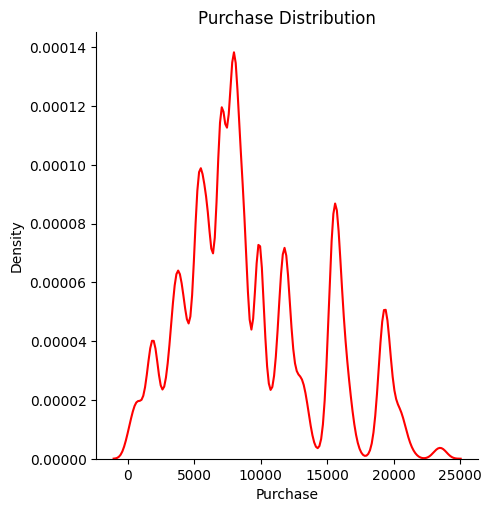

In [ ]:
sns.displot(data["Purchase"], color='r', kind='kde')  # For kernel density estimation
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

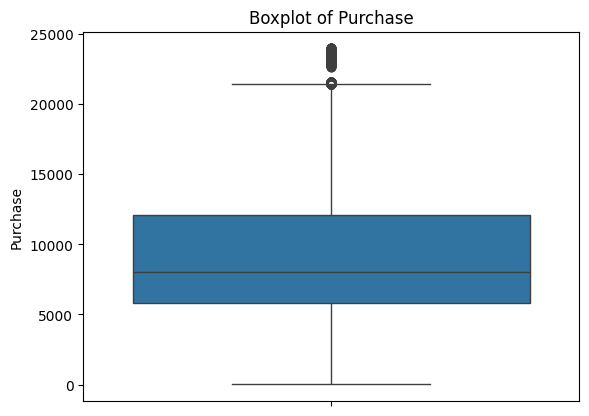

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [ ]:
data["Purchase"].skew()

0.6001400037087128

In [ ]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [ ]:
data["Purchase"].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

## **Gender**

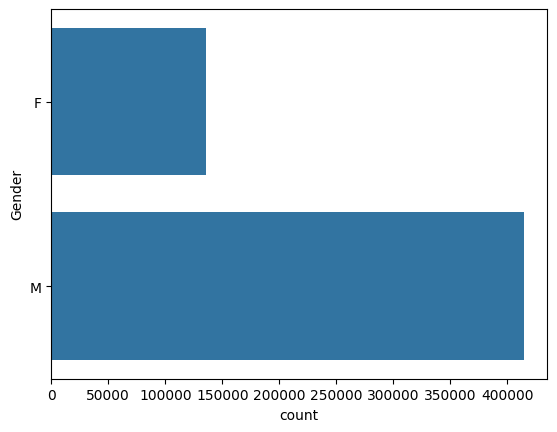

In [ ]:
sns.countplot(data['Gender'])
plt.show()

In [ ]:
data['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


There are more males than females

In [ ]:
import pandas as pd

data = pd.read_csv('/content/BlackFridaySales.csv')
data.groupby("Gender")["Purchase"].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

## **Marital Status**

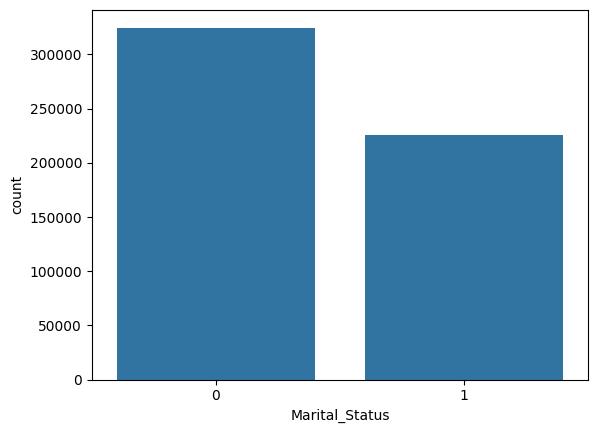

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' is DataFrame and 'Marital_Status' is a column in it
sns.countplot(x='Marital_Status', data=data)
plt.show()

There are more unmarried people in the dataset who purchase more

In [ ]:
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')
data.groupby("Marital_Status")["Purchase"].mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


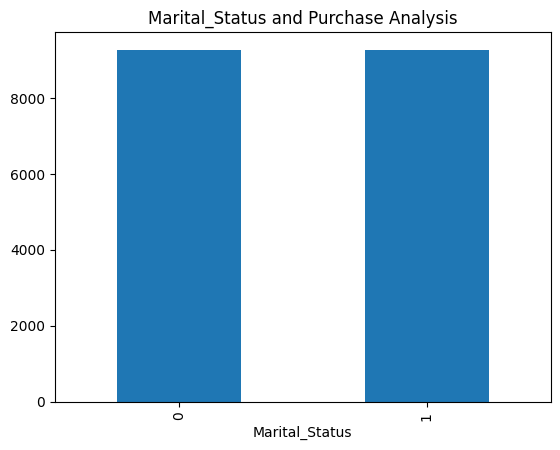

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/BlackFridaySales.csv')
# Selecting only the 'Purchase' column before calculating the mean
data.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

Though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

## **Occupation**

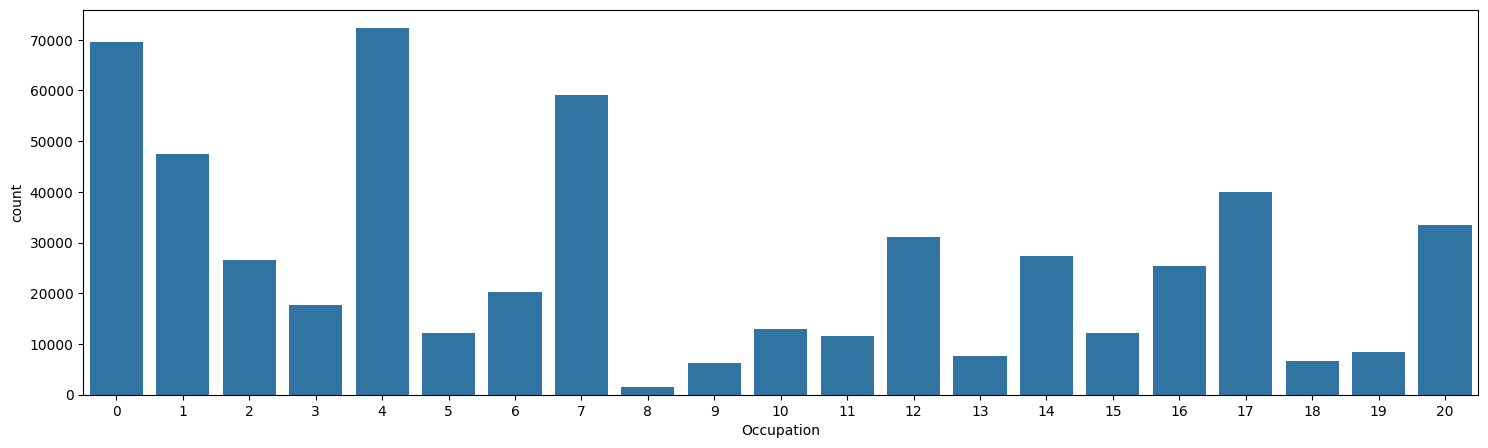

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')
plt.figure(figsize=(18, 5))
sns.countplot(x='Occupation',data=data)
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')

data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')
# Calculate the mean Purchase for each Occupation and store it in a DataFrame
occup = pd.DataFrame(data.groupby("Occupation")["Purchase"].mean())  # Access 'Purchase' after groupby
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


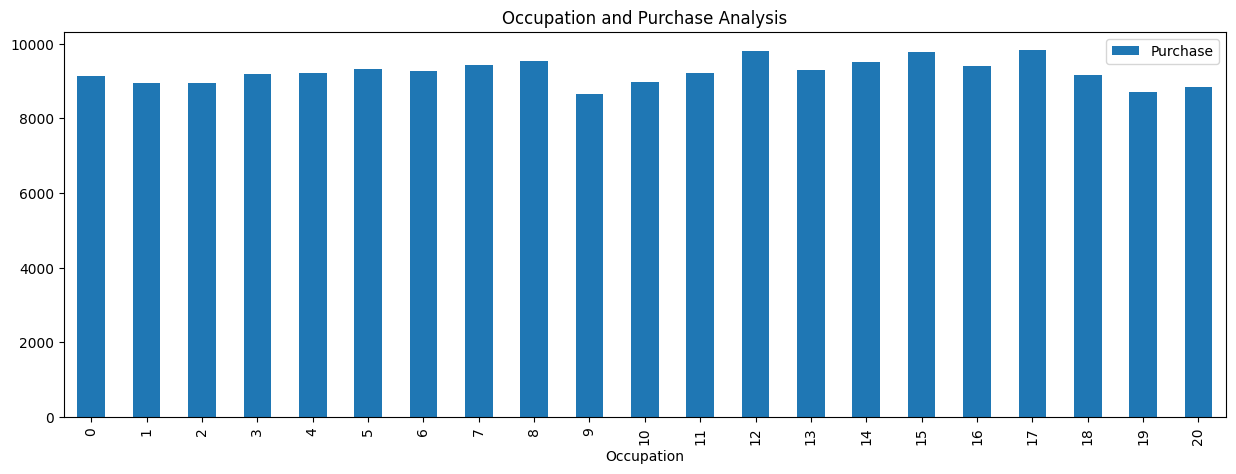

In [ ]:
import matplotlib.pyplot as plt
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

## **City_Category**

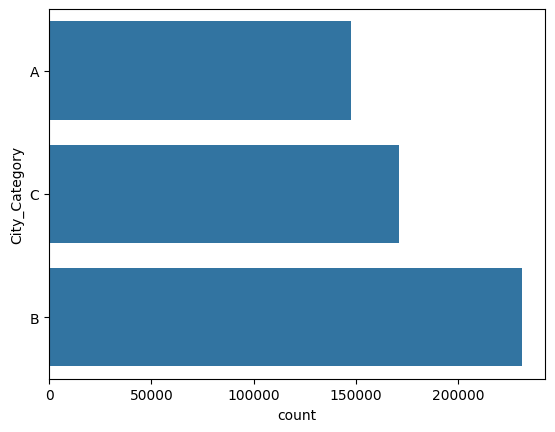

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

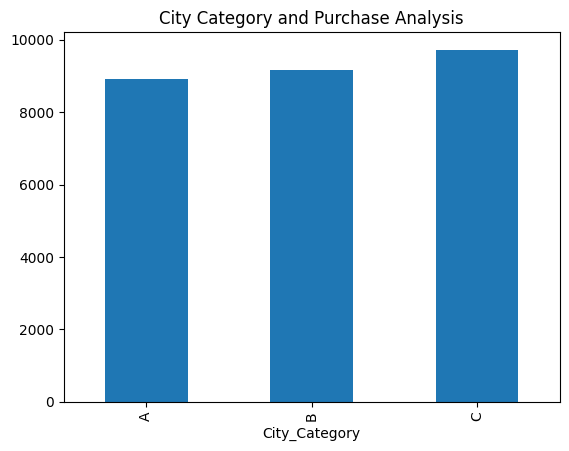

In [ ]:
data.groupby("City_Category").mean(numeric_only=True)["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

## **Stay_In_Current_City_Years**

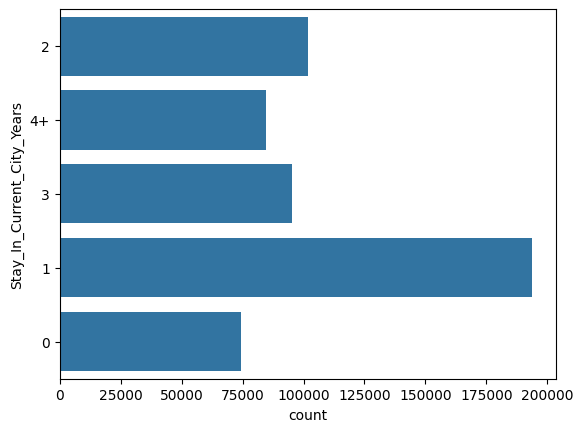

In [ ]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

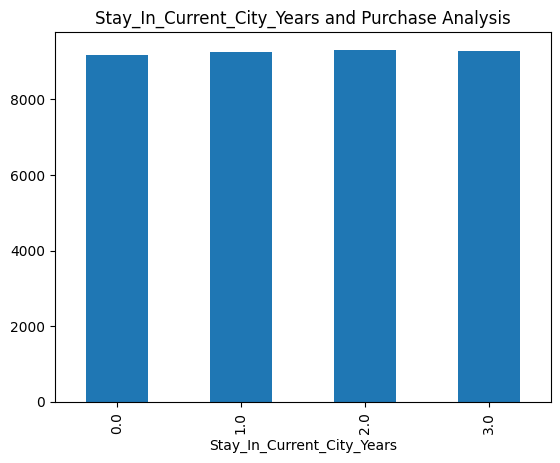

In [ ]:
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'], errors='coerce')
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')
data.groupby("Stay_In_Current_City_Years").mean(numeric_only=True)["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

## **Age**

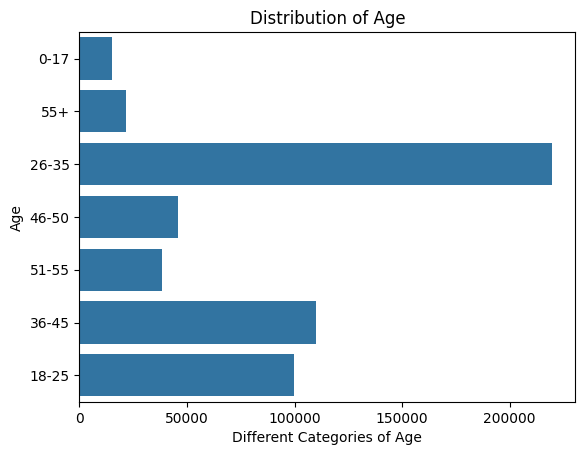

In [ ]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

<Axes: xlabel='Age'>

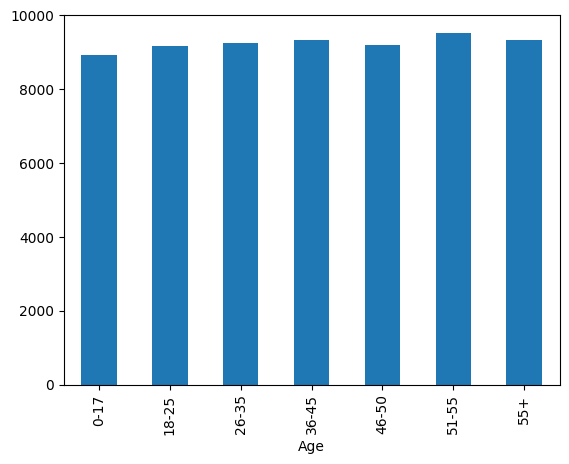

In [ ]:
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')
# Group by 'Age' and calculate the mean of 'Purchase', skipping non-numeric values.
data.groupby("Age").mean(numeric_only=True)["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

Text(0.5, 1.0, 'Age and Purchase Analysis')

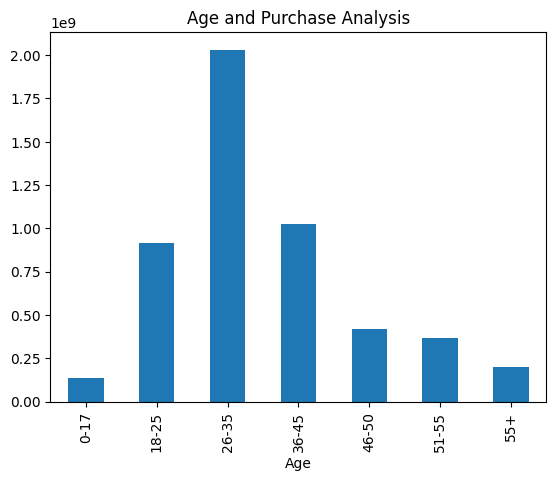

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/BlackFridaySales.csv')
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

## **Product_Category_1**

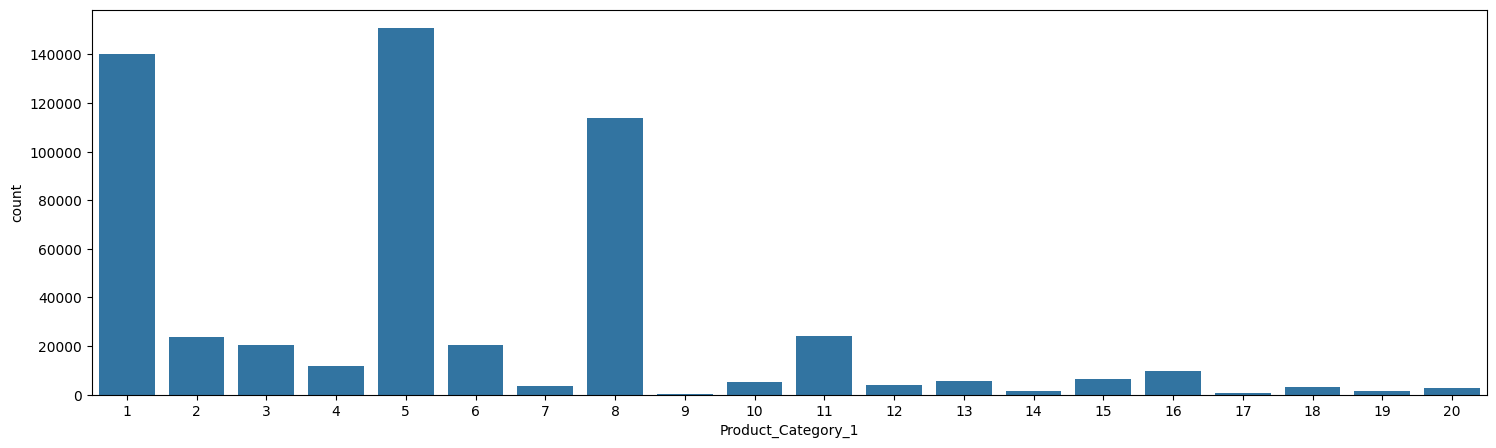

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/BlackFridaySales.csv')
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_1', data=data)
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

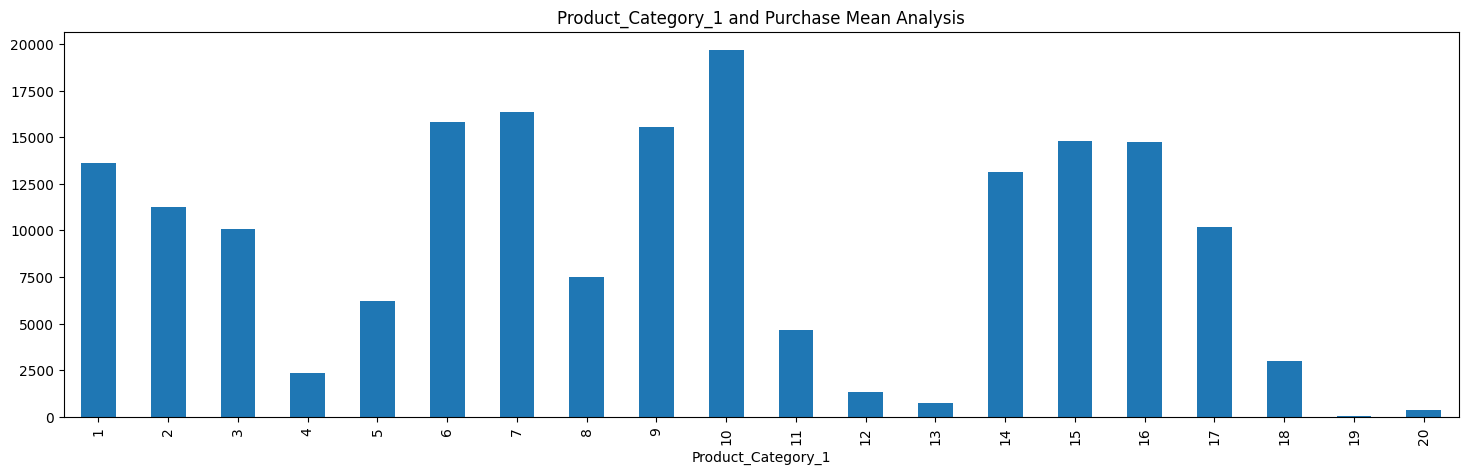

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/BlackFridaySales.csv')

# Convert 'Product_Category_1' to numeric if possible, replacing errors with NaN.
# If 'Product_Category_1' is not meant to be numeric, consider using other aggregation functions like .count() or .sum() for relevant columns.
data['Product_Category_1'] = pd.to_numeric(data['Product_Category_1'], errors='coerce')

# Group by 'Product_Category_1' and calculate the mean of 'Purchase', skipping non-numeric values in 'Product_Category_1'.
data.groupby('Product_Category_1').mean(numeric_only=True)['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. But the other categories appearing with high purchase values despite having low impact on sales number.

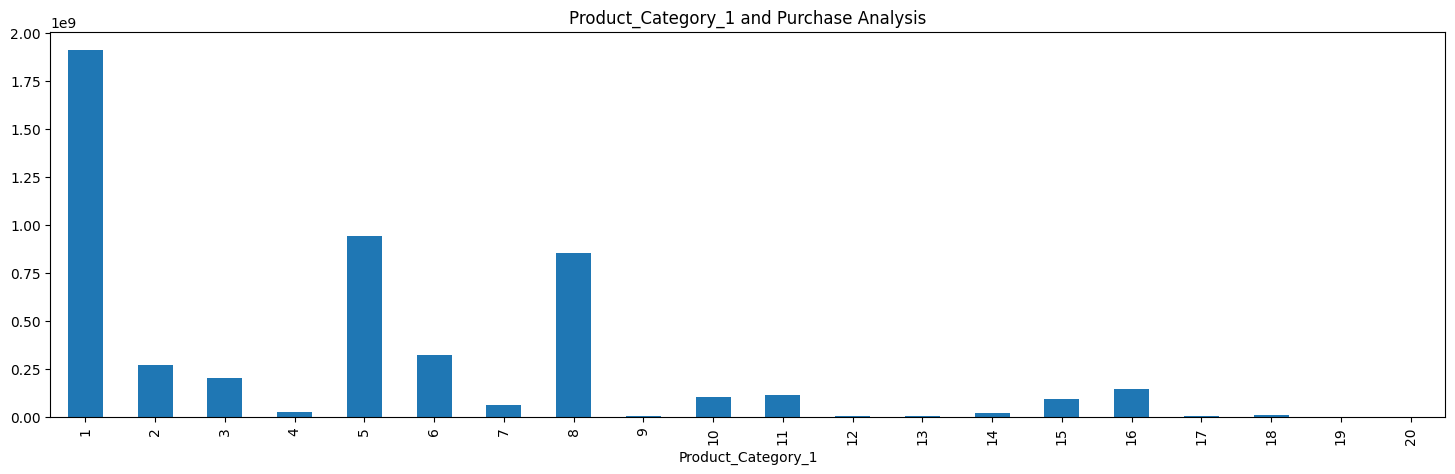

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')
# Convert 'Product_Category_1' to numeric if possible, replacing errors with NaN.
# If 'Product_Category_1' is not meant to be numeric, consider using other aggregation functions like .count() or .sum() for relevant columns.
data['Product_Category_1'] = pd.to_numeric(data['Product_Category_1'], errors='coerce')
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

## **Product_Category_2**

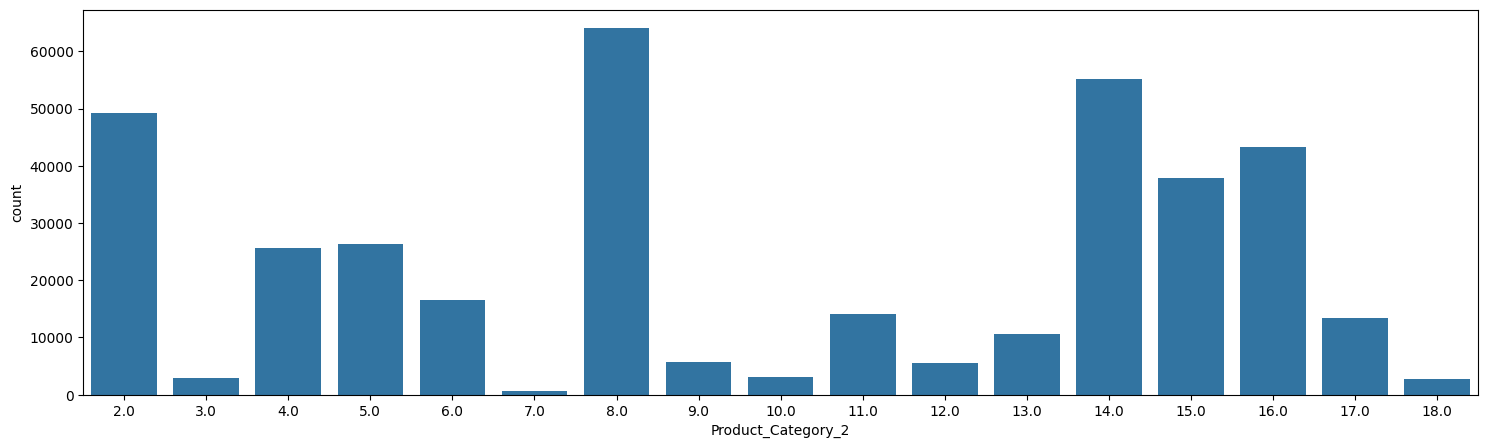

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/BlackFridaySales.csv')

plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_2',data=data)
plt.show()

## **Product_Category_3**

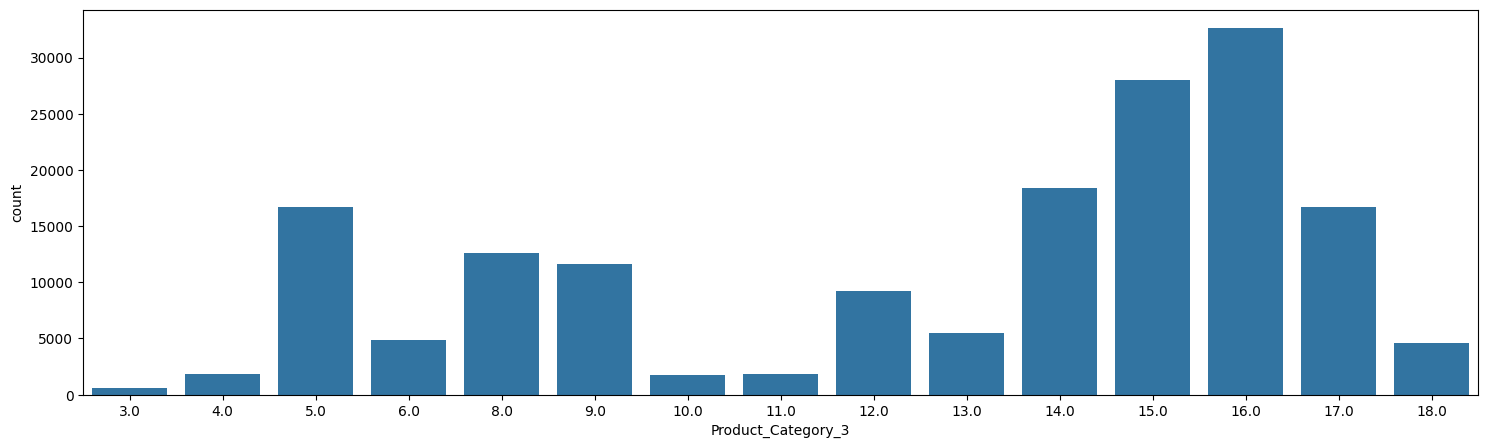

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/BlackFridaySales.csv')

plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_3',data=data)
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')
# calculate the correlation matrix
# Select only numeric columns before calculating the correlation
numerical_data = data.select_dtypes(include=['number']) # Select columns with numeric data types
numerical_data.corr() # Calculate the correlation matrix for numeric columns only

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


## **HeatMap**

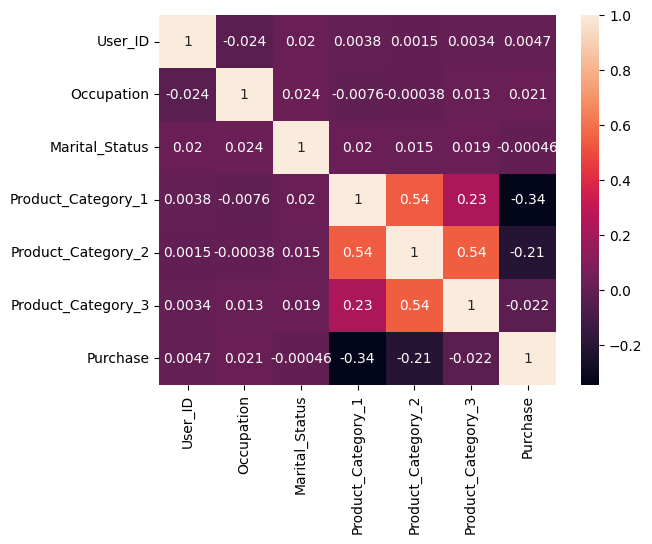

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('/content/BlackFridaySales.csv')

# Select only numeric columns before calculating the correlation
numerical_data = data.select_dtypes(include=['number']) # Select columns with numeric data types

sns.heatmap(numerical_data.corr(), annot=True)  # Calculate the correlation for numeric columns only
plt.show()

There is a some corellation between the product category groups.

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## **Encoding the categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [ ]:
df['Age'] = lr.fit_transform(df['Age'])

In [ ]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [ ]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

## **Dropping the irrelevant columns**

In [ ]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [ ]:
X = df.drop("Purchase",axis=1)

In [ ]:
y=df['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# **Modeling**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

9536.400764131597

In [ ]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

3532.069226165843

In [ ]:
mean_squared_error(y_test, y_pred)

21397853.26940751

In [ ]:
r2_score(y_test, y_pred)

0.15192944521481688

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


## **DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dt_y_pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [ ]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [ ]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [ ]:
from math import sqrt
print("RMSE of Decision Tree regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree regression Model is  3361.633452177241


## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFregressor = RandomForestRegressor(random_state = 0)

In [ ]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rf_y_pred = RFregressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [ ]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [ ]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [ ]:
from math import sqrt
print("RMSE of Random Forest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Regression Model is  3051.35541573242


## **XGBoost Regressor**

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_pred = xgb_reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [ ]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [ ]:
r2_score(y_test, xgb_y_pred)

0.6733734607696533

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print("RMSE of XGBoost Regression Model is ", sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Regression Model is  2870.7462594051135


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2870 and R2_Score = 0.673

## **Detailed Analysis**

**Exploratory Data Analysis (EDA):**

Provide visuals (histograms, heatmaps, scatter plots) for initial insights.
Analyze relationships between sales and features (e.g., customer age, gender, purchase category).

Highlight correlations between high-value purchases and specific demographics or product categories.

**Model Comparison and Selection:**

Summarize performance across models in a table.
Discuss trade-offs and why the selected model is optimal for the dataset and business requirements.

## **Third Party Library**

### **xgboost**

Use the !pip install command at the beginning of notebook to install any required third-party libraries.

**Execute command:**

!pip install xgboost